In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
import sklearn.metrics as m
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from  joblib import dump
import missingno as mso

In [3]:
url="penguins_regression.csv"
df=pd.read_csv(url)
df

,FlipperLength,BodyMass
0,181,3750
1,186,3800
2,195,3250
3,193,3450
4,190,3650
...,...,...
337,207,4000
338,202,3400
339,193,3775
340,210,4100


In [4]:
df.nunique()

FlipperLength    55
BodyMass         94
dtype: int64

In [5]:
model=Pipeline(steps=[
    ("regressor",RandomForestRegressor())
])

In [6]:
x,y=df.drop("BodyMass",axis=1),df["BodyMass"]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x.values,y.values,test_size=0.2,random_state=1)

In [8]:
param_grid={
    "regressor__criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "regressor__n_estimators":[5,101,5],
    "regressor__max_depth":[5,50,5]
}
result=GridSearchCV(model,param_grid,n_jobs=-1,verbose=1)
result.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=Pipeline(steps=[('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error',
                                                  'friedman_mse',
                                                  'absolute_error', 'poisson'],
                         'regressor__max_depth': [5, 50, 5],
                         'regressor__n_estimators': [5, 101, 5]},
             verbose=1)

In [9]:
result.best_params_

{'regressor__criterion': 'absolute_error',
 'regressor__max_depth': 5,
 'regressor__n_estimators': 5}

In [10]:
ypred=result.predict(xtest)

In [11]:
print("Metrics")
print(f"MAE:{m.mean_absolute_error(ytest,ypred):.2f}")
print(f"MSE:{m.mean_squared_error(ytest,ypred):.2f}")
print(f"Accuracy:{m.r2_score(ytest,ypred):.2f}")

Metrics
MAE:339.57
MSE:178611.41
Accuracy:0.71


<Axes: ylabel='Density'>

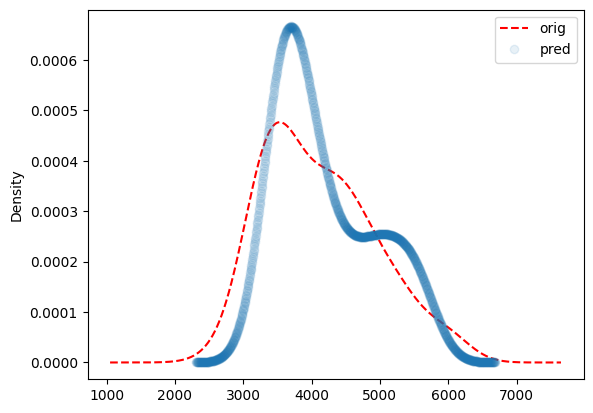

In [12]:
evaldf=pd.DataFrame([ytest,ypred],index=["orig","pred"]).T
ax=evaldf.plot(kind="kde",y="orig",style="r--")
evaldf.plot(kind="kde",y="pred",linewidth=6,alpha=.1,style="o",ax=ax)

In [13]:
dump(result,"penguin_predictor.jb")

['penguin_predictor.jb']

In [14]:
result.predict(df[["FlipperLength"]].head())


C:\Users\MY PC\miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([3567.5, 3492.5, 3820. , 3692.5, 3620. ])